## Introduction

This project is part of DJ Sanghvi IT Sem 4 Python course, year 2023.
The data used for the project is part of Kaggle Dataset.
In this project, we will be visualizing interesting factors that contribute to the mystery, i.e. Summer Olympic Medals (1976-2008).

## About the data

The "Summer Olympics Medals" dataset available on Kaggle is a comprehensive list of all medal winners in the Summer Olympics from 1976 Montreal to 2008 Beijing. The dataset includes every medal awarded during this time period, providing a rich resource for data analysis and predictive modeling.

This dataset is especially useful for beginners who want to learn advanced Excel functions, as it contains a large amount of data that can be used for a variety of analytical tasks. Additionally, this dataset can be leveraged for predictive modeling, enabling analysts to make predictions about which country is likely to win the highest number of gold medals in a particular sports category.

In summary, the "Summer Olympics Medals" dataset is a valuable resource for data scientists, providing a rich source of data that can be used for a wide range of analytical and predictive tasks. By exploring and analyzing this data, analysts can gain insights into trends and patterns in Olympic medal results, as well as develop predictive models to forecast future outcomes.


##Field	Description

* City: City that hosted the Olympic Games
* Year:	Year the Olympic Games took place (held every 4yrs)
* Sport:	Sport Catergory (eg. Aquatics, Atheletics etc.)
* Discipline:	The discipline within the sport (eg. Diving, Swimming etc.)
* Event:	Event Name within the particular discipline (eg. 3m springboard, 10m platform etc.)
* Athlete:	Winners name in that event
* Gender:	Athletes Gender
* Country Code:	3 character country code
* Country: Country to which the winning athlete represents
* Event Gender: (Male, Female or Common Event)
* Medal: Medal Awarded(eg. Bronze, Silver, Gold)

In [ ]:
# First, we need to mount the Google Drive to our Colab notebook
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd

# Specify the file path and encoding
file_path = 'Summer-Olympic-medals-1976-to-2008.csv'
encoding = 'ISO-8859-1'
df = pd.read_csv(file_path, encoding=encoding)


In [2]:
#data exploration - first 5 frames
print(df.head())

       City    Year     Sport Discipline           Event  \
0  Montreal  1976.0  Aquatics     Diving  3m springboard   
1  Montreal  1976.0  Aquatics     Diving  3m springboard   
2  Montreal  1976.0  Aquatics     Diving  3m springboard   
3  Montreal  1976.0  Aquatics     Diving  3m springboard   
4  Montreal  1976.0  Aquatics     Diving    10m platform   

                    Athlete Gender Country_Code        Country Event_gender  \
0           KÖHLER, Christa  Women          GDR   East Germany            W   
1       KOSENKOV, Aleksandr    Men          URS   Soviet Union            M   
2      BOGGS, Philip George    Men          USA  United States            M   
3  CAGNOTTO, Giorgio Franco    Men          ITA          Italy            M   
4    WILSON, Deborah Keplar  Women          USA  United States            W   

    Medal  
0  Silver  
1  Bronze  
2    Gold  
3  Silver  
4  Bronze  


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing

# Visualizations 

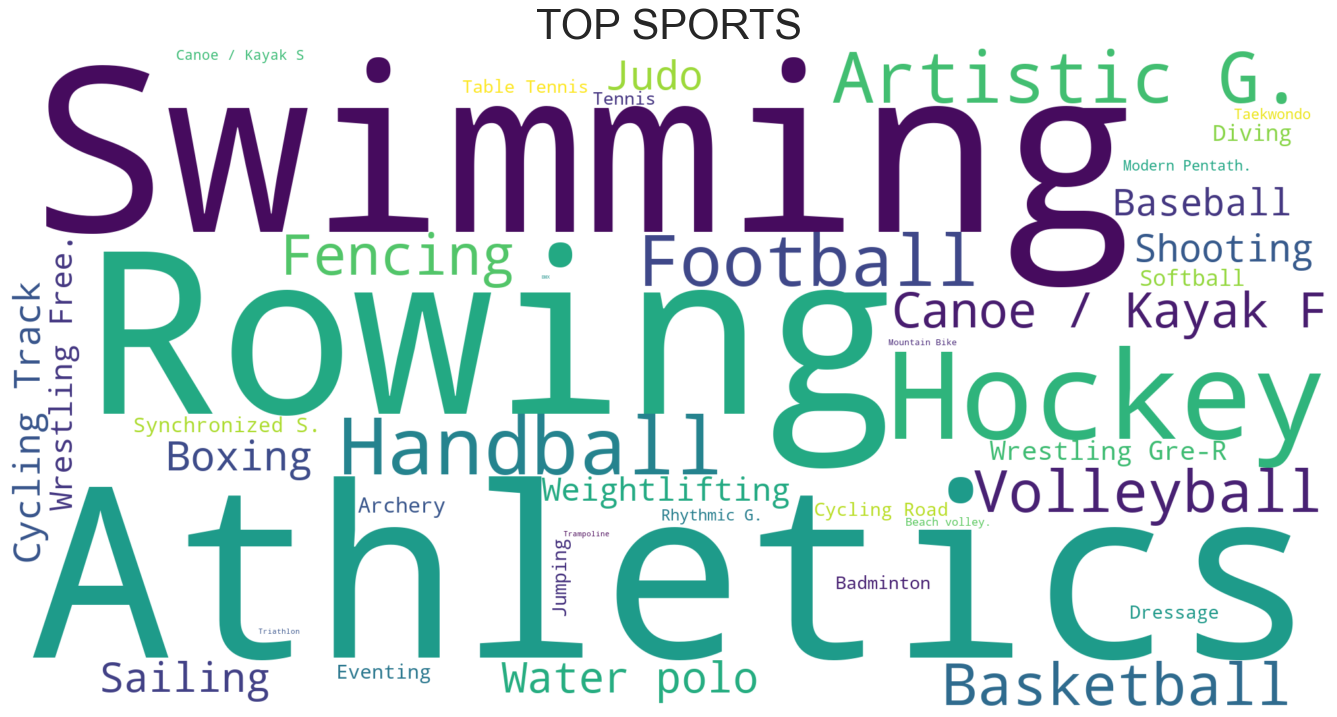

In [9]:
#compares no of participants in sports
from wordcloud import WordCloud


count_discipline = df.Discipline.value_counts()
count_discipline

sns.set_style("ticks")

wordcloud = WordCloud(
                    width=2000,
                    height=1000, 
                    scale=1,
                    normalize_plurals=False,
                    repeat=False,
                    random_state=42,
                    background_color='white')

wordcloud.generate_from_frequencies(frequencies = count_discipline)
plt.figure(figsize=(17,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('TOP SPORTS', fontsize = 30)
plt.show()

In [10]:
ts = df[['Athlete','Medal','Country','Year']].value_counts().rename_axis(['Athlete','Medal','Country','Year']).reset_index(name='counts').sort_values('counts',ascending=False)
ts

,Athlete,Medal,Country,Year,counts
0,"PHELPS, Michael",Gold,United States,2008.0,8
2,"SCHERBO, Vitaly",Gold,Unified team,1992.0,6
3,"OTTO, Kristin",Gold,East Germany,1988.0,6
1,"PHELPS, Michael",Gold,United States,2004.0,6
4,"BIONDI, Matthew",Gold,United States,1988.0,5
...,...,...,...,...,...
5259,"WESTBROOK, Peter Jonathan",Bronze,United States,1984.0,1
5260,"WEST, Taribo",Gold,Nigeria,1996.0,1
5261,"WEST, Michael",Silver,Canada,1984.0,1
5262,"WERTH, Isabell",Gold,Germany,2000.0,1


In [11]:
br=ts.groupby('Athlete').sum().sort_values(by='counts',ascending=False).reset_index()

<Axes: xlabel='counts', ylabel='Athlete'>

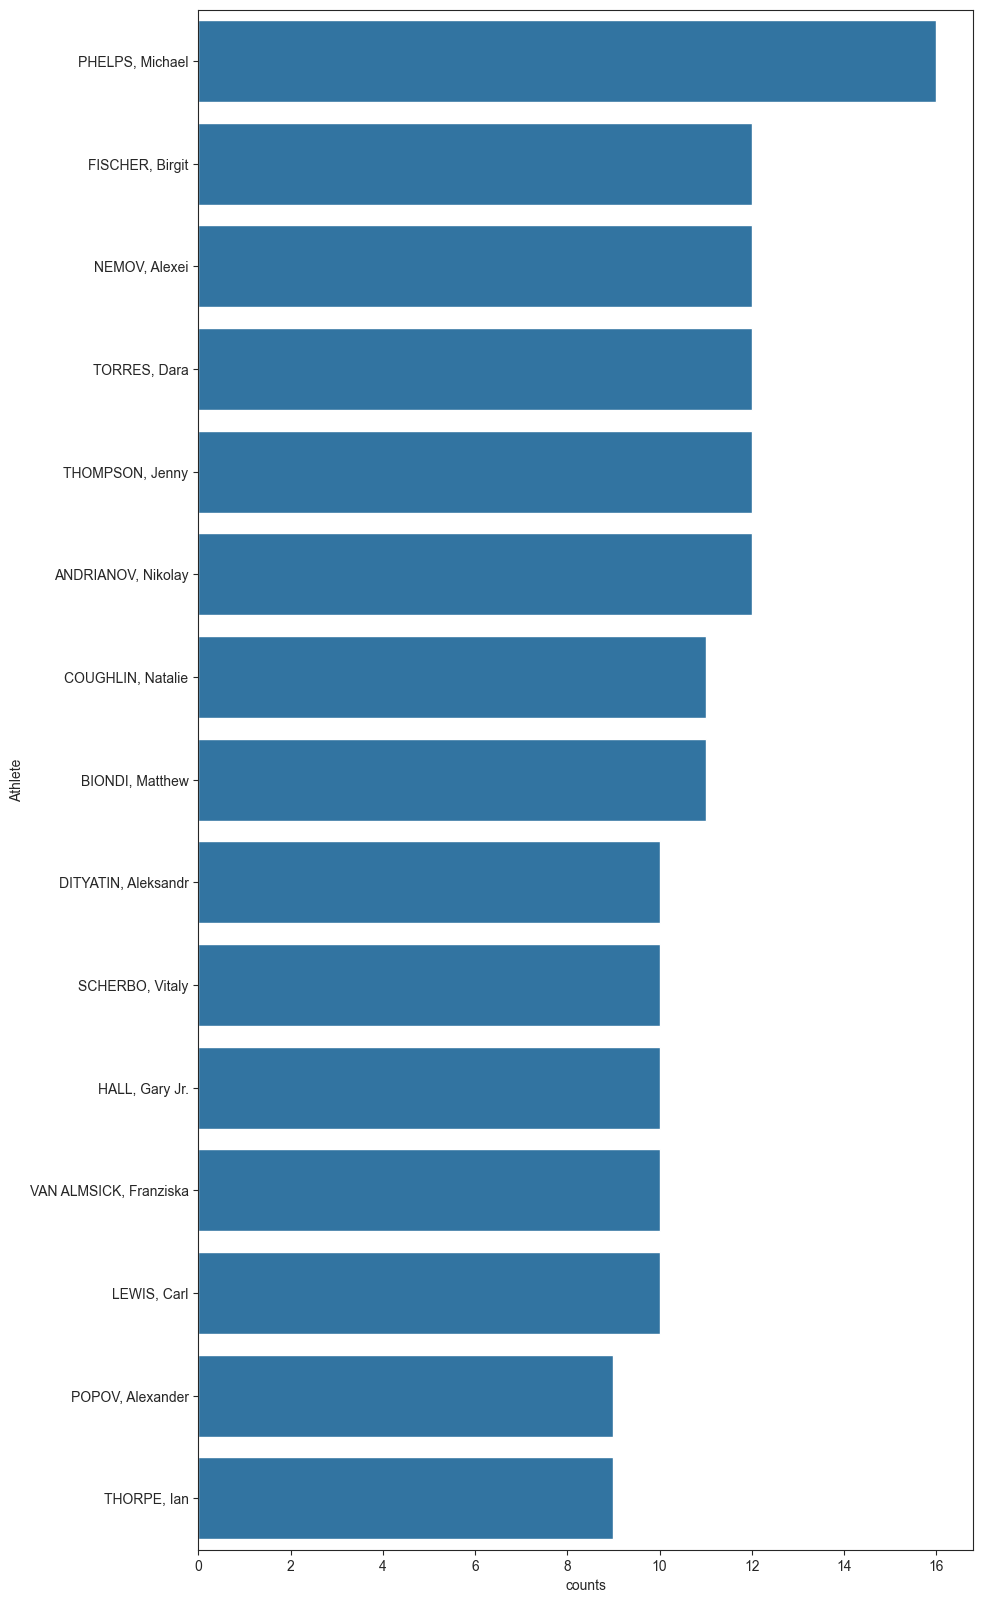

In [12]:
#shows no. of medals won by top 15 athletes
plt.figure(figsize=(10,20))
sns.barplot(y='Athlete',x='counts',data=br[:15])

C:\Users\DELL\AppData\Local\Temp\ipykernel_4888\3369597486.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=medal_counts.index, x=medal_counts.values, palette='mako').set(title=str(year))


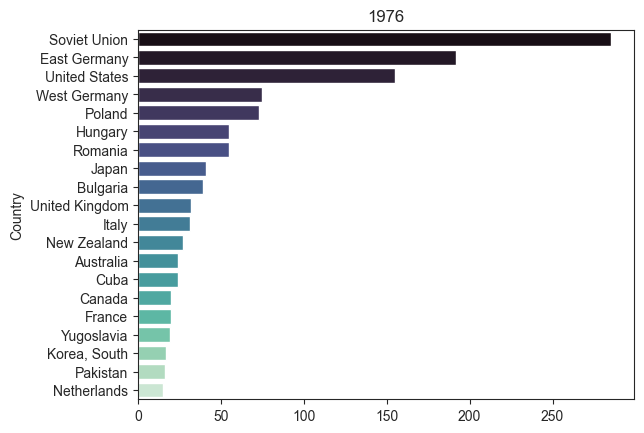

C:\Users\DELL\AppData\Local\Temp\ipykernel_4888\3369597486.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=athlete_counts.index, x=athlete_counts.values, palette='mako')


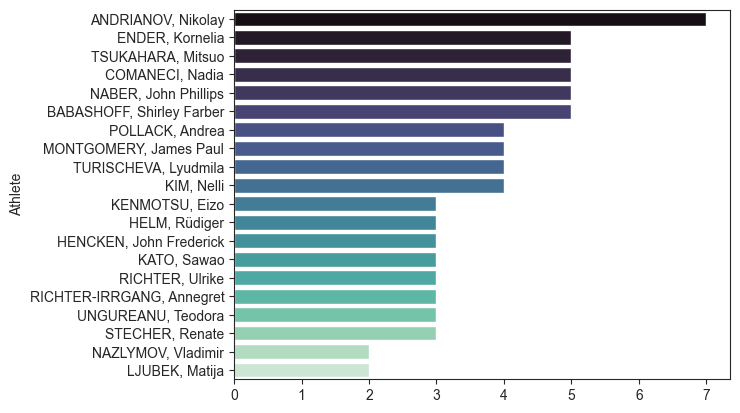

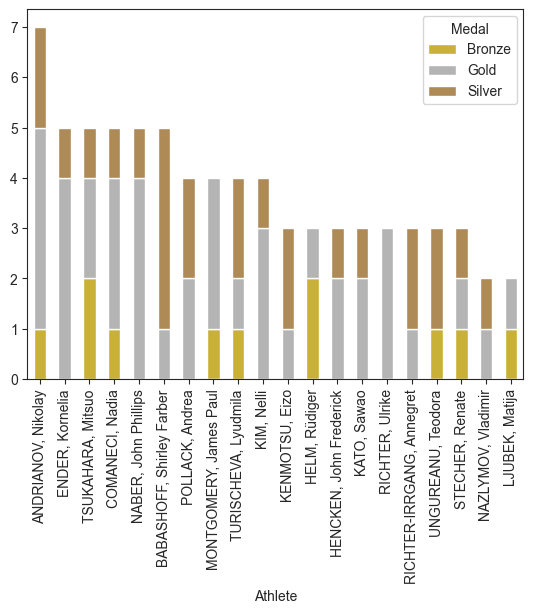

C:\Users\DELL\AppData\Local\Temp\ipykernel_4888\3369597486.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=medal_counts.index, x=medal_counts.values, palette='mako').set(title=str(year))


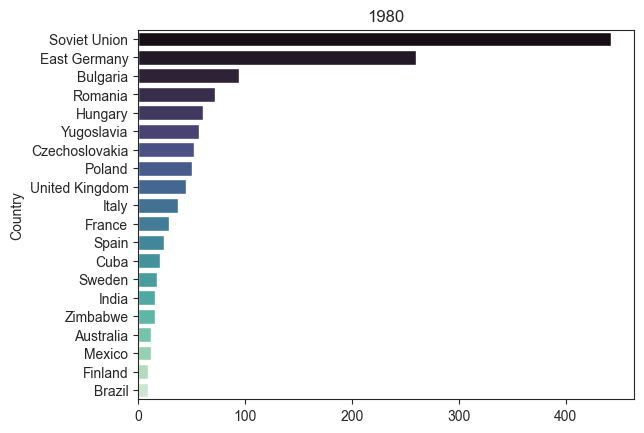

C:\Users\DELL\AppData\Local\Temp\ipykernel_4888\3369597486.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=athlete_counts.index, x=athlete_counts.values, palette='mako')


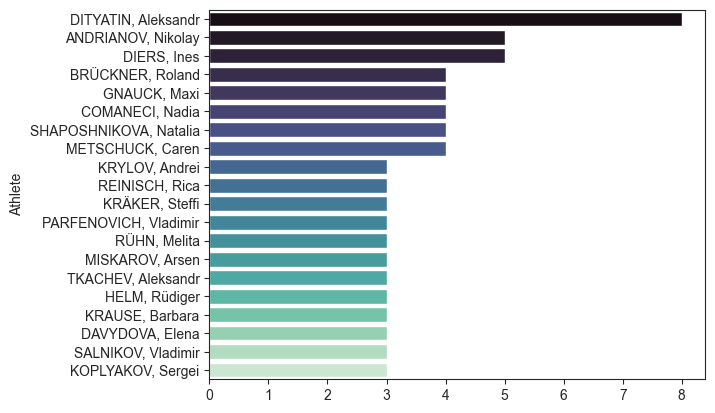

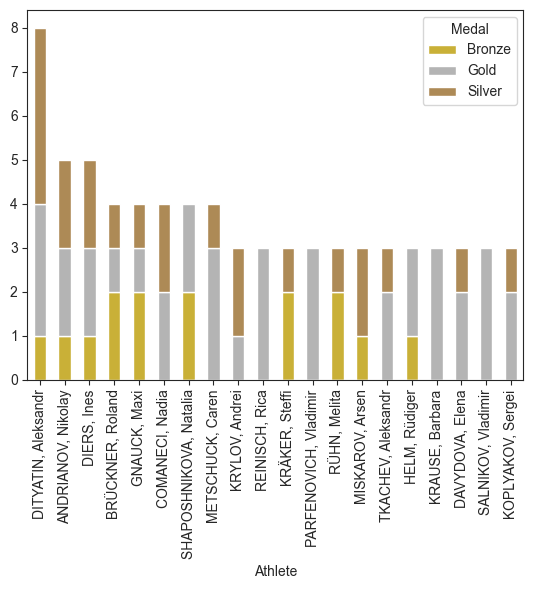

C:\Users\DELL\AppData\Local\Temp\ipykernel_4888\3369597486.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=medal_counts.index, x=medal_counts.values, palette='mako').set(title=str(year))


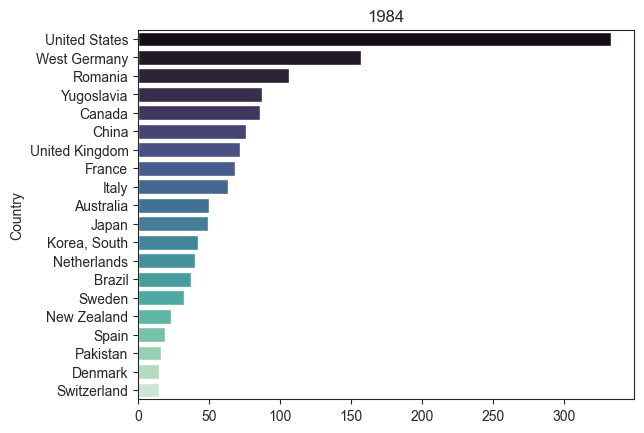

C:\Users\DELL\AppData\Local\Temp\ipykernel_4888\3369597486.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=athlete_counts.index, x=athlete_counts.values, palette='mako')


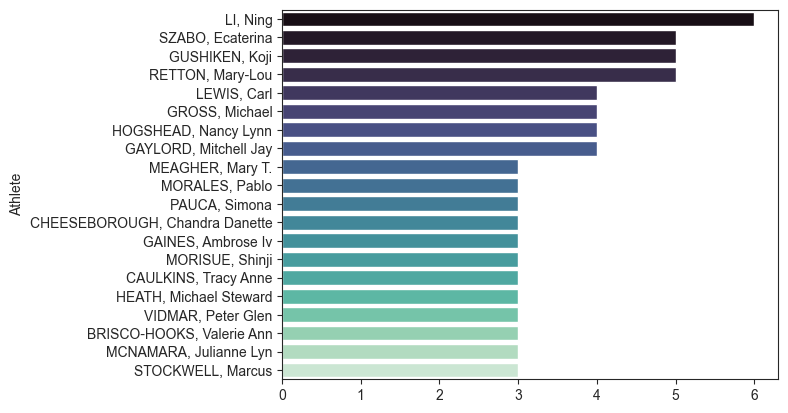

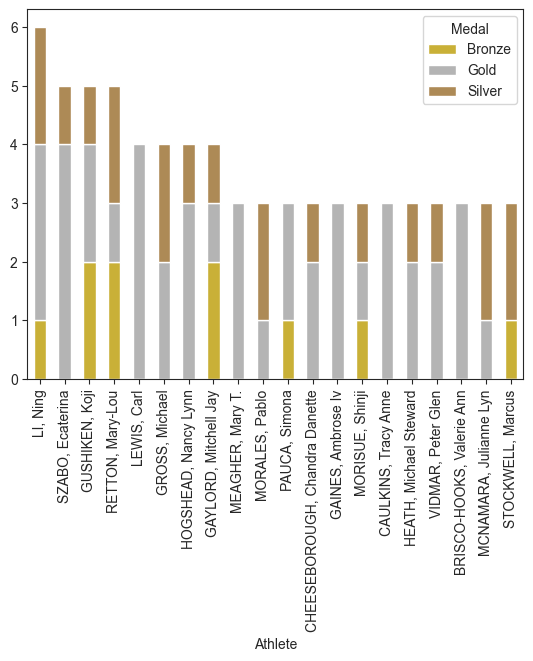

C:\Users\DELL\AppData\Local\Temp\ipykernel_4888\3369597486.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=medal_counts.index, x=medal_counts.values, palette='mako').set(title=str(year))


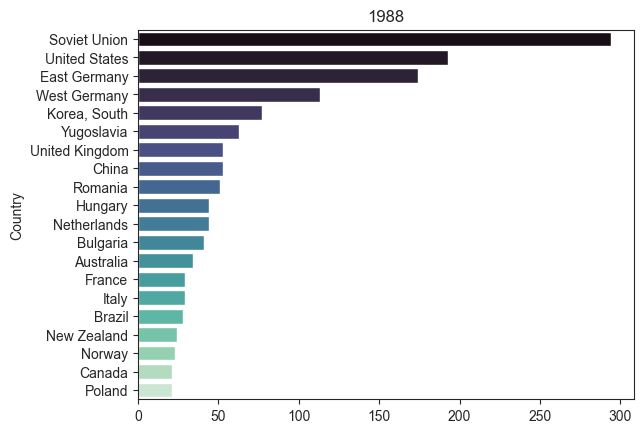

C:\Users\DELL\AppData\Local\Temp\ipykernel_4888\3369597486.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=athlete_counts.index, x=athlete_counts.values, palette='mako')


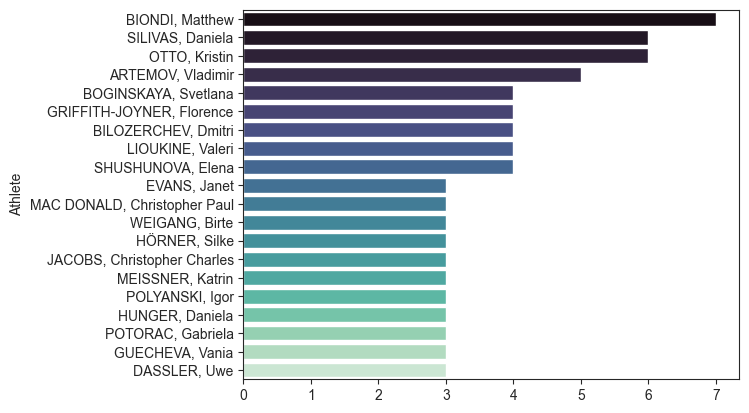

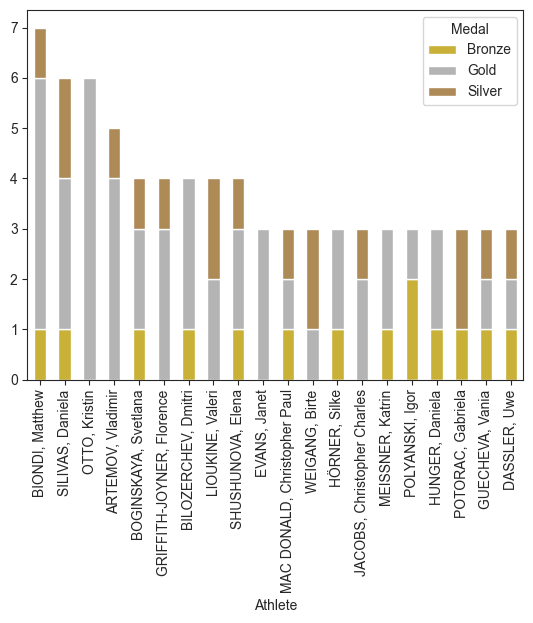

C:\Users\DELL\AppData\Local\Temp\ipykernel_4888\3369597486.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=medal_counts.index, x=medal_counts.values, palette='mako').set(title=str(year))


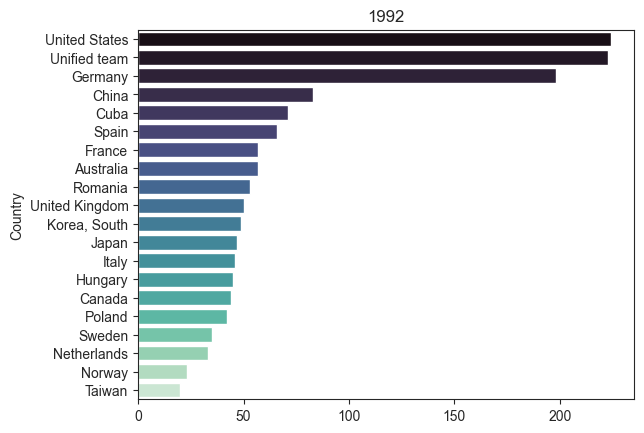

C:\Users\DELL\AppData\Local\Temp\ipykernel_4888\3369597486.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=athlete_counts.index, x=athlete_counts.values, palette='mako')


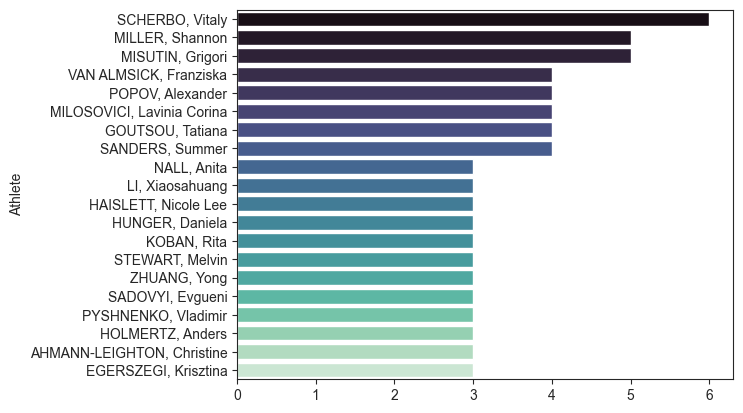

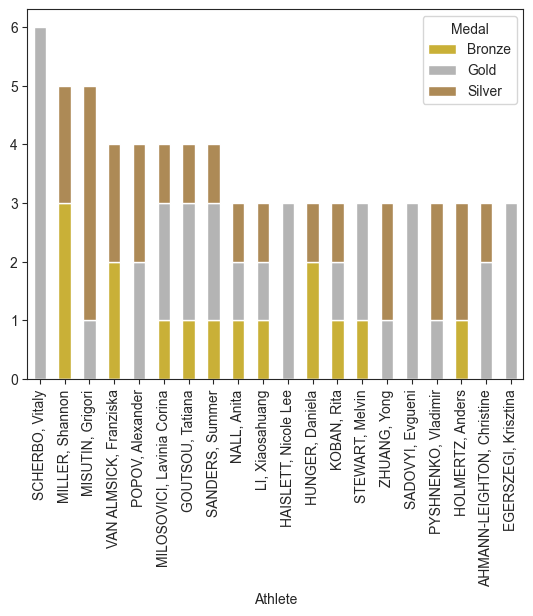

C:\Users\DELL\AppData\Local\Temp\ipykernel_4888\3369597486.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=medal_counts.index, x=medal_counts.values, palette='mako').set(title=str(year))


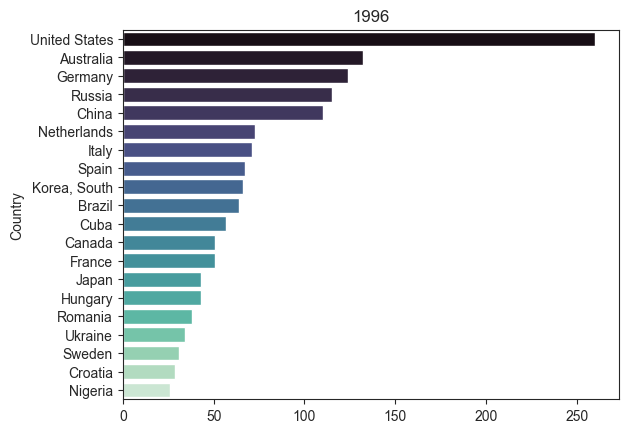

C:\Users\DELL\AppData\Local\Temp\ipykernel_4888\3369597486.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=athlete_counts.index, x=athlete_counts.values, palette='mako')


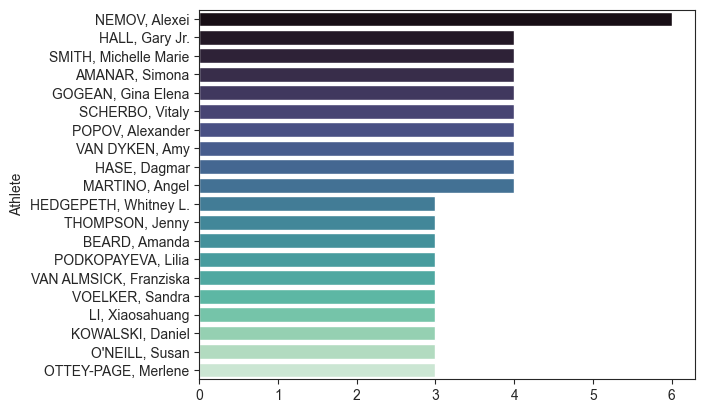

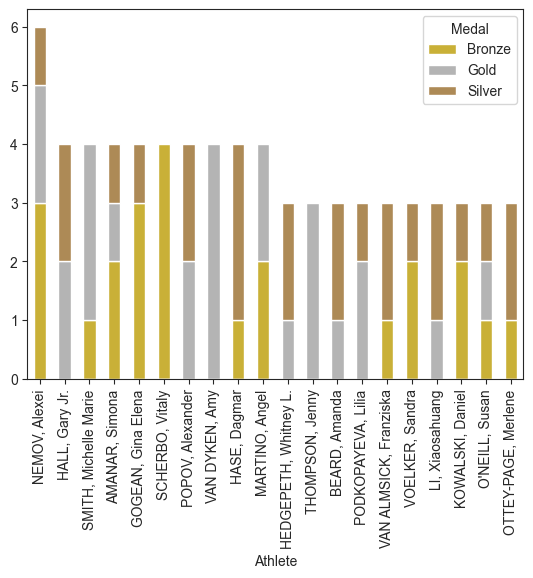

C:\Users\DELL\AppData\Local\Temp\ipykernel_4888\3369597486.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=medal_counts.index, x=medal_counts.values, palette='mako').set(title=str(year))


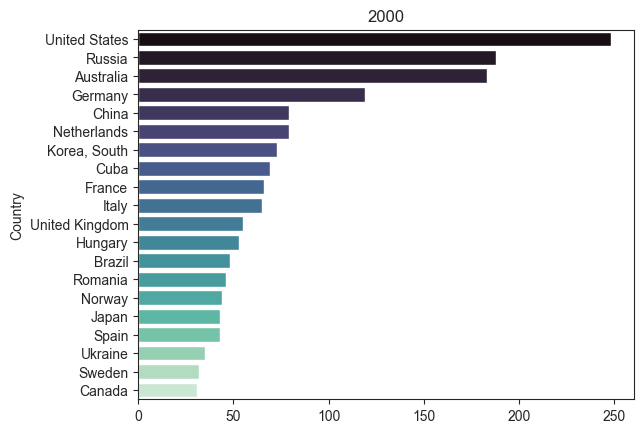

C:\Users\DELL\AppData\Local\Temp\ipykernel_4888\3369597486.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=athlete_counts.index, x=athlete_counts.values, palette='mako')


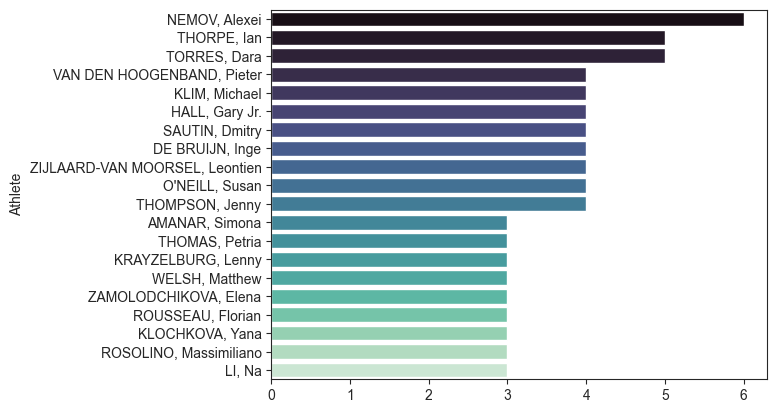

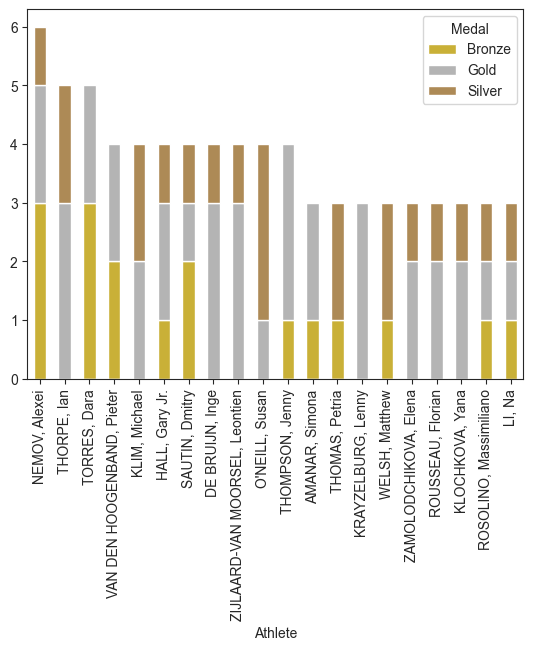

C:\Users\DELL\AppData\Local\Temp\ipykernel_4888\3369597486.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=medal_counts.index, x=medal_counts.values, palette='mako').set(title=str(year))


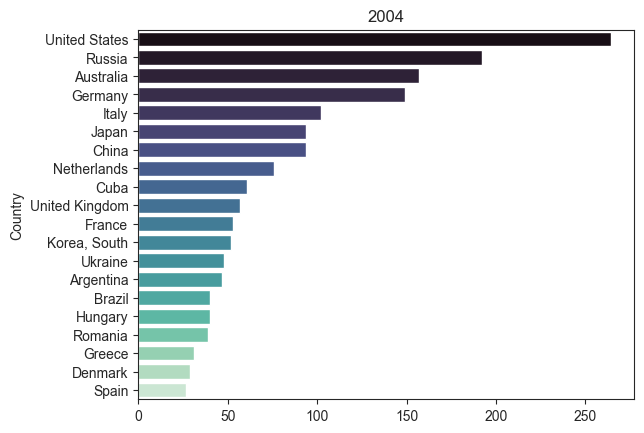

C:\Users\DELL\AppData\Local\Temp\ipykernel_4888\3369597486.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=athlete_counts.index, x=athlete_counts.values, palette='mako')


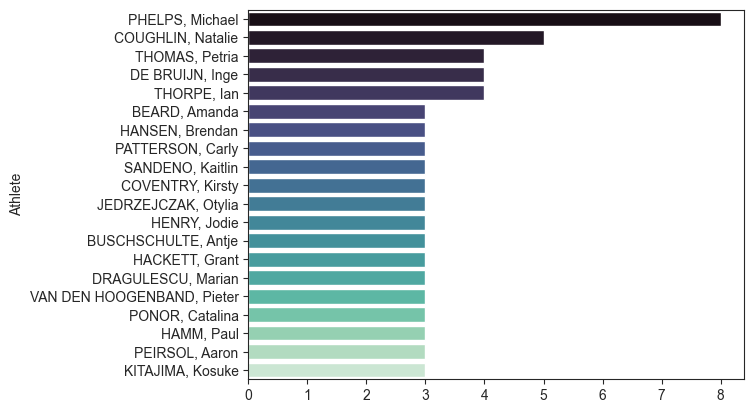

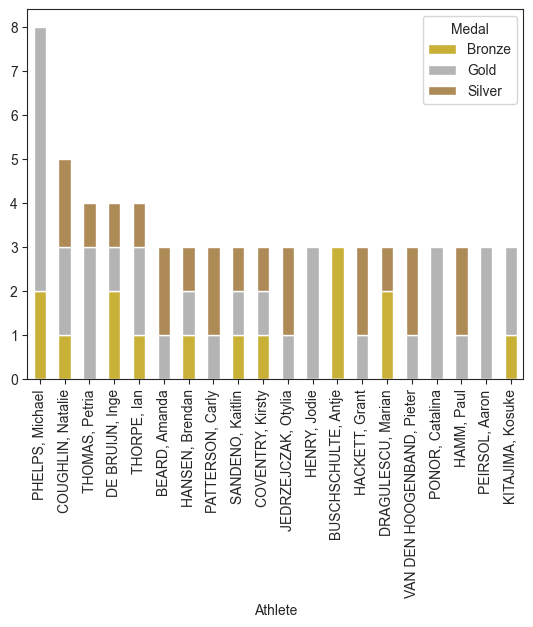

C:\Users\DELL\AppData\Local\Temp\ipykernel_4888\3369597486.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=medal_counts.index, x=medal_counts.values, palette='mako').set(title=str(year))


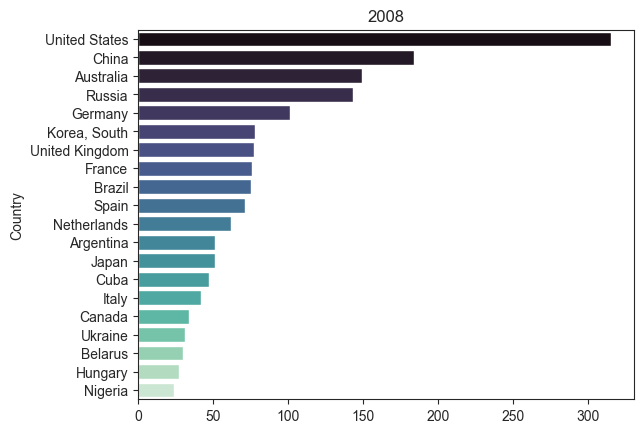

C:\Users\DELL\AppData\Local\Temp\ipykernel_4888\3369597486.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=athlete_counts.index, x=athlete_counts.values, palette='mako')


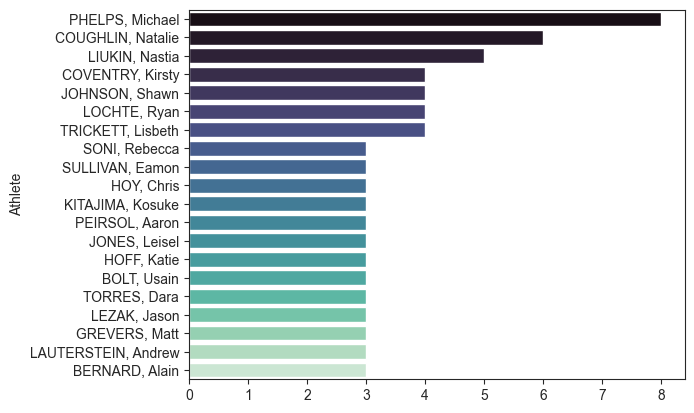

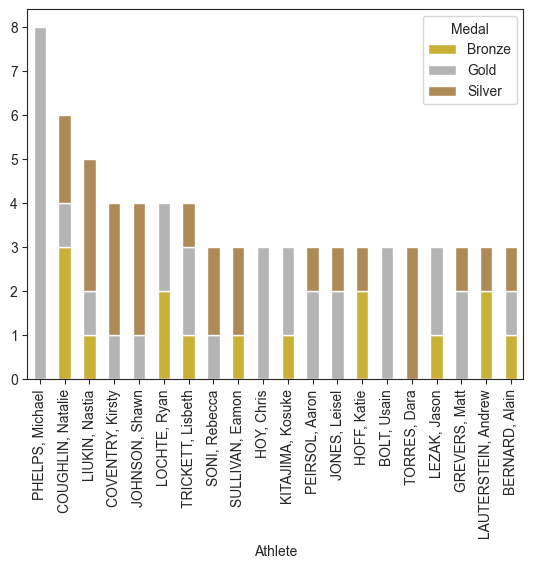

In [13]:
years = [1976, 1980, 1984, 1988, 1992, 1996, 2000, 2004, 2008]

# Generate the plots for each year
for year in years:
    # Top 20 countries with the most medals
    medal_counts = df[df['Year'] == year]['Country'].value_counts().nlargest(20)
    sns.barplot(y=medal_counts.index, x=medal_counts.values, palette='mako').set(title=str(year))
    plt.show()

    # Top 20 athletes with the most medals
    athlete_counts = df[df['Year'] == year]['Athlete'].value_counts().nlargest(20)
    sns.barplot(y=athlete_counts.index, x=athlete_counts.values, palette='mako')
    plt.show()

    # Medals won by country
    # medal_counts_by_country = df[df['Year'] == year].groupby(['Country', 'Medal'])['Medal'].count().unstack('Medal').fillna(0)
    # sns.heatmap(medal_counts_by_country, annot=True, cmap='mako')
    # fig.tight_layout()
    # plt.show()

    # Medals won by athlete
    medal_counts_by_athlete = df[df['Year'] == year].groupby(['Athlete', 'Medal'])['Medal'].count().unstack('Medal').fillna(0)
    medal_counts_by_athlete = medal_counts_by_athlete.loc[athlete_counts.index] # Limit to top 20 athletes
    medal_counts_by_athlete.plot(kind='bar', stacked=True, color=['#C9B037','#B4B4B4','#AD8A56'])
    plt.show()


#We noticed...

Soviet Union was not a part of 1984 olympics, it was always at the top in the rest of the years. 

After Russia was formed, United States took over the olympics.
US, Russia, China & Australia have consistently been topping.

Michael Phelps has been leading in terms of most medals won by athlete consistently. (Golds mainly..)

In [14]:
df.dropna(inplace=True)
df.shape
#dropping null values

(15316, 11)

In [15]:
athlete_per_year = df.Year.value_counts() #tells me the number of games played each year. Typically the information is sorted by the number of games played NOT the year! In this situation, 
# it is by most recent year to the oldest year
athlete_per_year

Year
2008.0    2042
2000.0    2015
2004.0    1998
1996.0    1859
1992.0    1705
1988.0    1546
1984.0    1459
1980.0    1387
1976.0    1305
Name: count, dtype: int64

In [16]:
number_of_athlete_by_year = athlete_per_year.sort_index() #now we have sorted by years, oldest to most recent 
number_of_athlete_by_year

Year
1976.0    1305
1980.0    1387
1984.0    1459
1988.0    1546
1992.0    1705
1996.0    1859
2000.0    2015
2004.0    1998
2008.0    2042
Name: count, dtype: int64

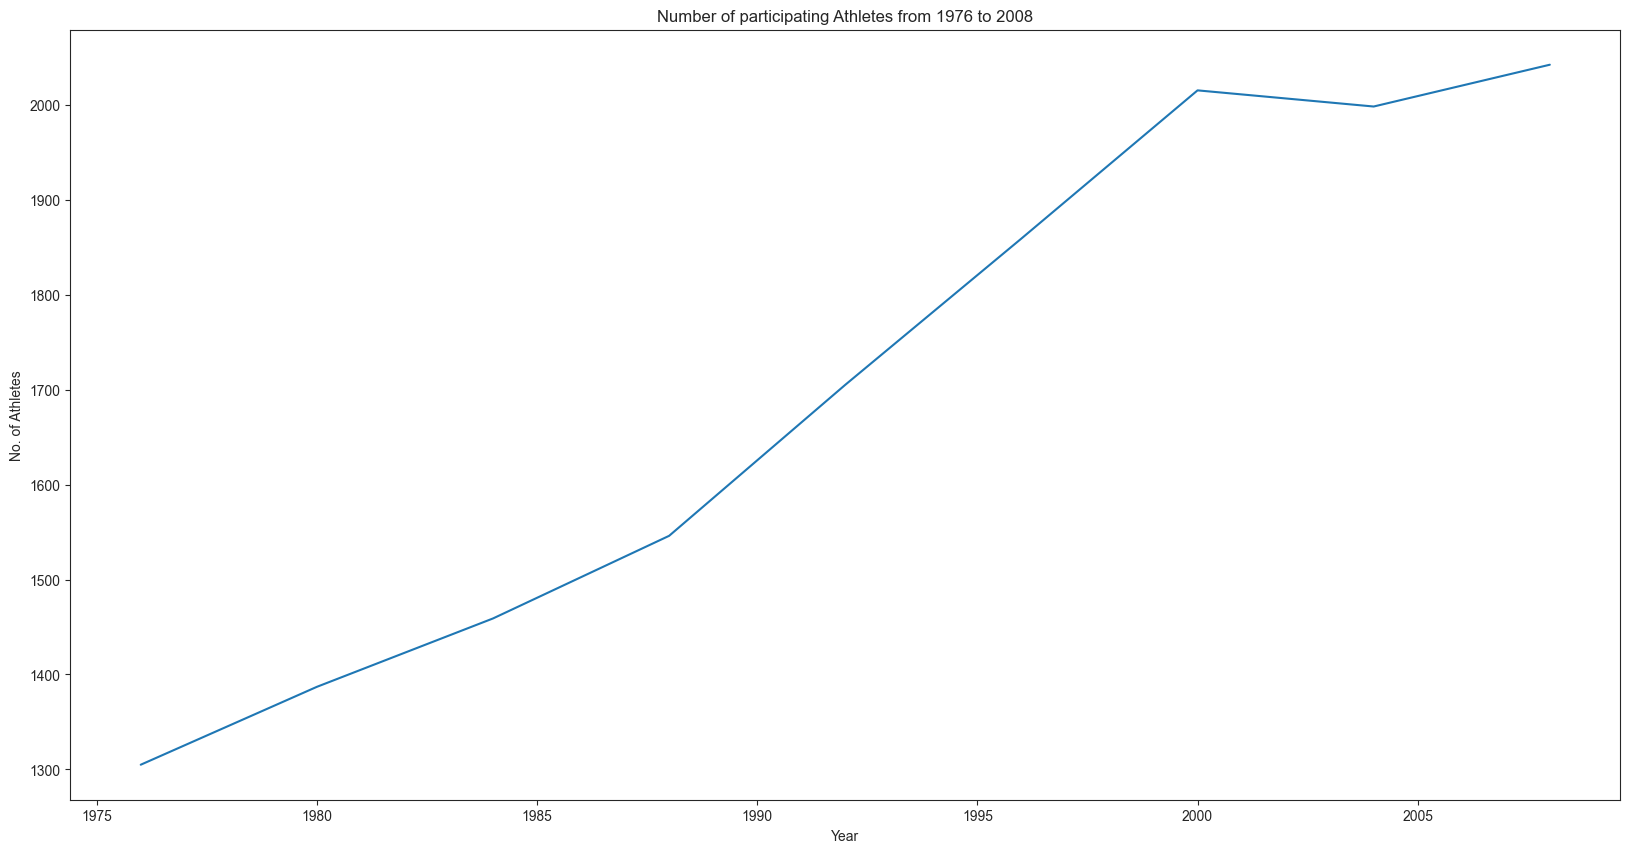

In [17]:
plt.figure(figsize=(20, 10))
number_of_athlete_by_year.plot();
plt.title('Number of participating Athletes from 1976 to 2008')
plt.xlabel('Year')
plt.ylabel('No. of Athletes');

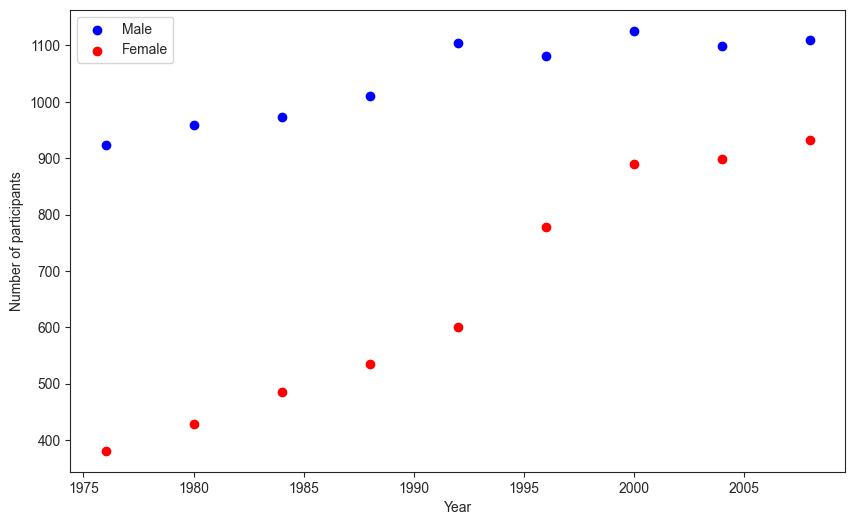

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# # Load the dataset
# df = pd.read_csv('summer-olympics.csv')

# Select columns of interest
df = df[['Year', 'Gender']]

# Group by year and sex to count number of participants
participation = df.groupby(['Year', 'Gender']).size().reset_index(name='Count')

# Create scatterplot
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(participation[participation['Gender'] == 'Men']['Year'], participation[participation['Gender'] == 'Men']['Count'], color='blue', label='Male')
ax.scatter(participation[participation['Gender'] == 'Women']['Year'], participation[participation['Gender'] == 'Women']['Count'], color='red', label='Female')

# Set plot properties
ax.set_xlabel('Year')
ax.set_ylabel('Number of participants')
ax.legend()
plt.show()


In [20]:
df.columns

Index(['Year', 'Gender'], dtype='object')

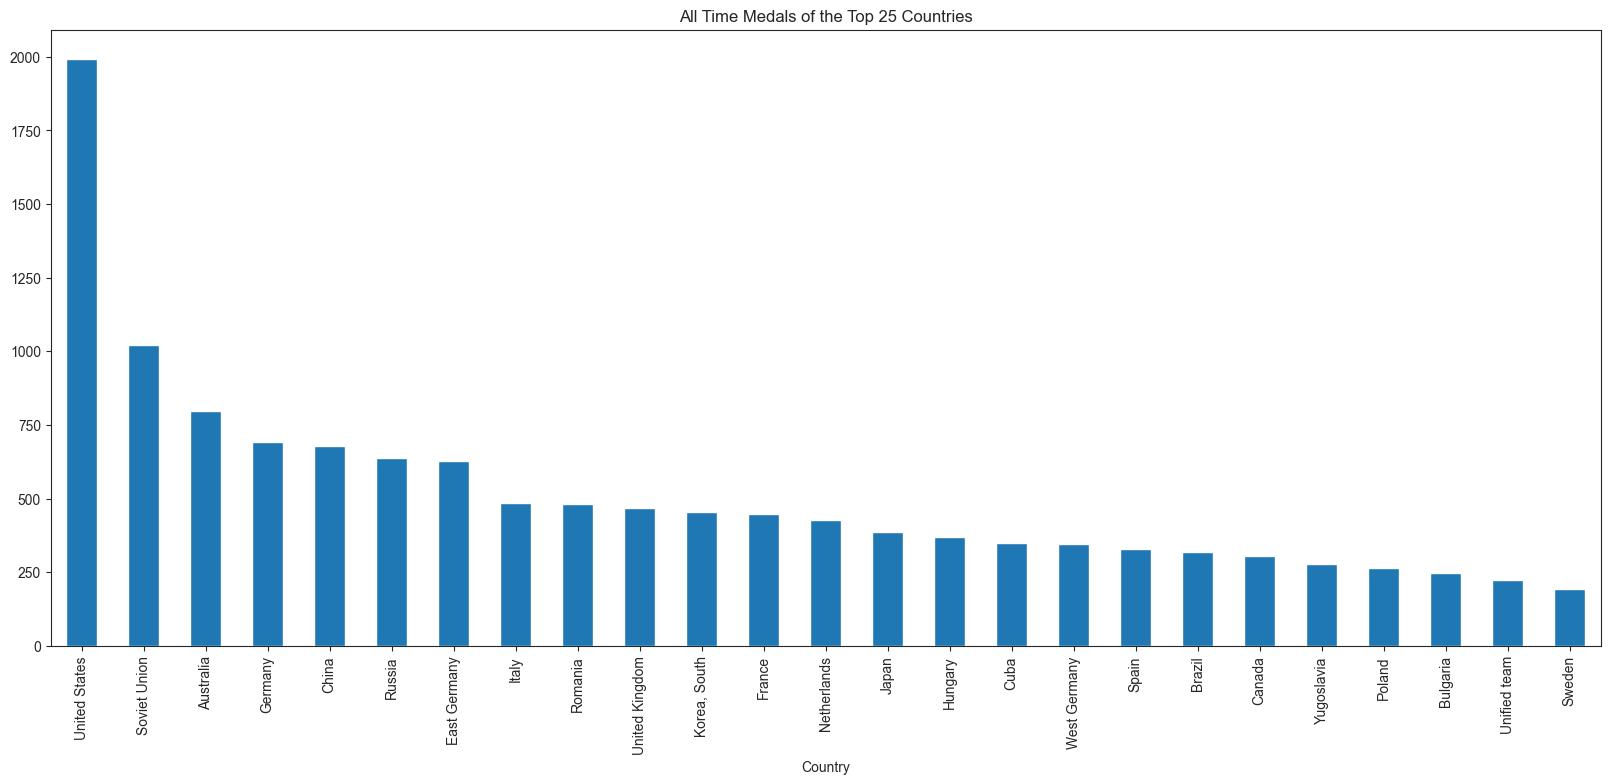

In [22]:
import pandas as pd

# Specify the file path and encoding
file_path = 'Summer-Olympic-medals-1976-to-2008.csv'
encoding = 'ISO-8859-1'

# Read the CSV file into a dataframe
df = pd.read_csv(file_path, encoding=encoding)

df = df['Country'].value_counts().sort_values(ascending=False)
all_countries = df[:25]
all_countries.plot(kind='bar',figsize=(20,8))
plt.title('All Time Medals of the Top 25 Countries');

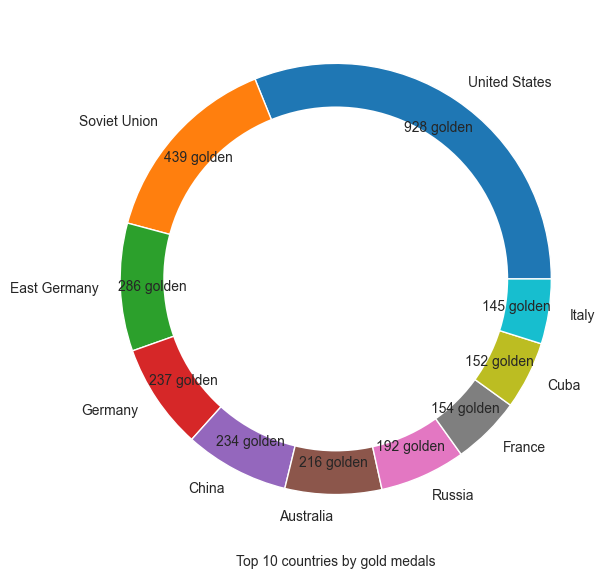

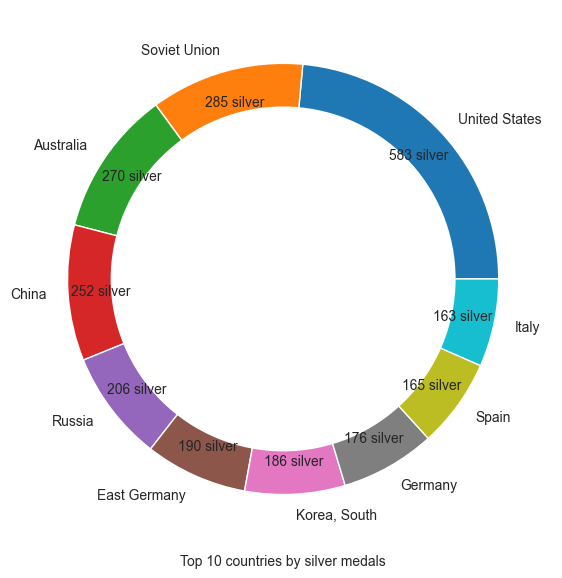

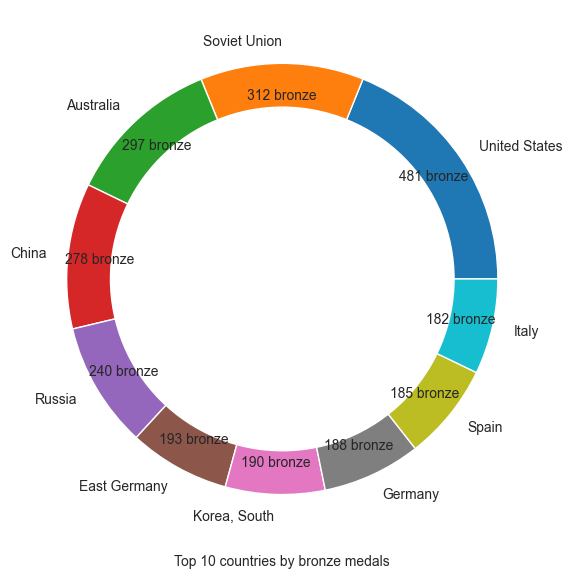

In [23]:
#Top Gold, Silver, Bronze
import matplotlib.pyplot as plt
#data = pd.read_csv('../input/summer-olympics-medals/Summer-Olympic-medals-1976-to-2008.csv',encoding='latin-1')
file_path = 'Summer-Olympic-medals-1976-to-2008.csv'
encoding = 'ISO-8859-1'

# Read the CSV file into a dataframe
data = pd.read_csv(file_path, encoding=encoding)
gold_country = data[data.Medal == 'Gold'].groupby(['Country']).Medal.size()
gold_top_10 = gold_country.sort_values(ascending = False)[:10]
plt.figure(figsize=(9,7))
top_10_gold_pie = plt.pie(gold_top_10, labels=gold_top_10.index, 
                             autopct= lambda x: f'{x*sum(gold_top_10.values)/100 :.0f} golden', pctdistance=0.85)
pr_pie_circle = plt.Circle((0,0), 0.8, color='black', fc='white', linewidth=0)
p=plt.gcf()
p.gca().add_artist(pr_pie_circle)
plt.xlabel('Top 10 countries by gold medals')
plt.savefig('gold.png')


silver_country = data[data.Medal == 'Silver'].groupby(['Country']).Medal.size()
silver_top_10 = silver_country.sort_values(ascending = False)[:10]
plt.figure(figsize=(9,7))
top_10_silver_pie = plt.pie(silver_top_10, labels=silver_top_10.index, 
                             autopct= lambda x: f'{x*sum(silver_top_10.values)/100 :.0f} silver', pctdistance=0.85)
pr_pie_circle = plt.Circle((0,0), 0.8, color='black', fc='white', linewidth=0)
p=plt.gcf()
p.gca().add_artist(pr_pie_circle)
plt.xlabel('Top 10 countries by silver medals')
plt.savefig('silver.png')


bronze_country = data[data.Medal == 'Bronze'].groupby(['Country']).Medal.size()
bronze_top_10 = bronze_country.sort_values(ascending = False)[:10]
plt.figure(figsize=(9,7))
top_10_bronze_pie = plt.pie(bronze_top_10, labels=silver_top_10.index, 
                             autopct= lambda x: f'{x*sum(bronze_top_10.values)/100 :.0f} bronze', pctdistance=0.85)
pr_pie_circle = plt.Circle((0,0), 0.8, color='black', fc='white', linewidth=0)
p=plt.gcf()
p.gca().add_artist(pr_pie_circle)
plt.xlabel('Top 10 countries by bronze medals')
plt.savefig('bronze.png')

United States has won most number of medals in all categories(Gold, Silver, Bronze)

In [24]:
df1 = pd.get_dummies(df, columns = ['Medal'])
country_list = list(df1['Country'].unique())              

medal_gold = []
medal_silver = []
medal_bronze = []
for i in country_list:
    x = df1[df1["Country"] == i]
    gold = x.Medal_Gold.sum()
    medal_gold.append(gold)
    silver = x.Medal_Silver.sum()
    medal_silver.append(silver)
    bronze = x.Medal_Bronze.sum()
    medal_bronze.append(bronze)
no_of_medals = pd.DataFrame({"Country": country_list,
    "medal_gold": medal_gold, 'medal_silver': medal_silver,
    'medal_bronze': medal_bronze})
no_of_medals["Total_medals"]=no_of_medals["medal_gold"]+no_of_medals["medal_silver"]+no_of_medals["medal_bronze"]
no_of_medals=no_of_medals.sort_values(by="Total_medals",ascending=False)

plt.figure(figsize=(7,9),dpi=150)
sns.barplot(y="Country",x="Total_medals",data=no_of_medals[:30])
#plt.xticks(rotation=90);

no_of_medals30 = no_of_medals[:30]
plt.figure(figsize=(8,8),dpi=150)
plt.xticks(rotation=90)
sns.lineplot(data=no_of_medals30, x="Country", y="medal_silver")
sns.lineplot(data=no_of_medals30, x="Country", y="medal_gold")
sns.lineplot(data=no_of_medals30, x="Country", y="medal_bronze")
sns.lineplot(data=no_of_medals30, x="Country", y="Total_medals")
plt.legend(["Silver", 'Gold', 'Bronze', 'Total'])

KeyError: 'Country'

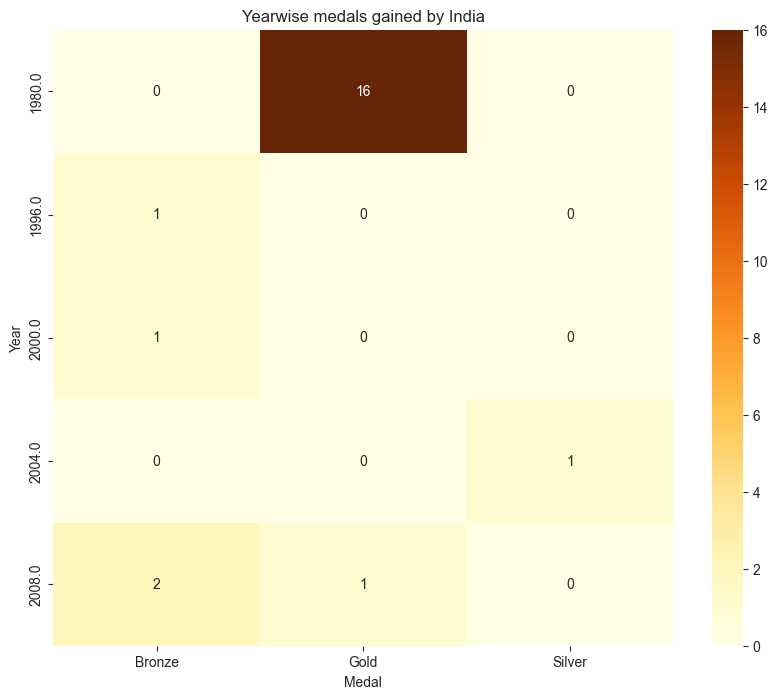

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the data for India only
india_data = data[data['Country'] == 'India']

# Pivot the data to get yearwise medals for India
india_medals = india_data.pivot_table(index='Year', columns='Medal', aggfunc='size', fill_value=0)

# Create the heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(india_medals, cmap='YlOrBr', annot=True, fmt='d')
plt.title('Yearwise medals gained by India')
plt.xlabel('Medal')
plt.ylabel('Year')
plt.show()


# Conclusion



In conclusion, data visualization is a powerful tool for presenting information in a clear and concise way. It allows us to see patterns, trends, and relationships that may not be apparent in raw data. By selecting the appropriate type of visualization and designing it effectively, we can convey complex information quickly and accurately. 

In the case of "Summer Olympic Medals" data, a lot of insights were gained in terms of participation trends,medals won by countries over years as well as athlete's wins. We learnt the real life use cases of barplots, pie-circles, scatterplots, heatmaps, line-graphs, etc.


In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


In [53]:
file_path = 'Summer-Olympic-medals-1976-to-2008.csv'  # Make sure this matches your uploaded file
df = pd.read_csv(file_path, encoding='ISO-8859-1')  # Use the correct encoding


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15433 entries, 0 to 15432
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   City          15316 non-null  object 
 1   Year          15316 non-null  float64
 2   Sport         15316 non-null  object 
 3   Discipline    15316 non-null  object 
 4   Event         15316 non-null  object 
 5   Athlete       15316 non-null  object 
 6   Gender        15316 non-null  object 
 7   Country_Code  15316 non-null  object 
 8   Country       15316 non-null  object 
 9   Event_gender  15316 non-null  object 
 10  Medal         15316 non-null  object 
dtypes: float64(1), object(10)
memory usage: 1.3+ MB


In [59]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Assuming df is your DataFrame
# Define X (features) and y (target)
X = df[['Gender_Women']]  # Using the binary indicator for women
y = df['Medal_Won']       # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


Mean Squared Error: 0.006728504754526418
R^2 Score: 0.004135210681086354


In [60]:
import pandas as pd

# Create a test DataFrame
test_data = pd.DataFrame({
    'Gender_Women': [1, 0, 1, 0]  # Replace with your test values
})

# Make predictions
predictions = model.predict(test_data)

# Display predictions
predictions = ['Won Medal' if p >= 0.5 else 'Did Not Win Medal' for p in predictions]
print("Predictions:", predictions)


Predictions: ['Won Medal', 'Won Medal', 'Won Medal', 'Won Medal']
